In [44]:
import numpy as np
import pandas as pd
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

import warnings
import seaborn as sns 
from itertools import cycle
import matplotlib.pyplot as plt
import os
import openpyxl
from openpyxl import Workbook as wb

%matplotlib inline 
plt.style.use('bmh')
sns.set_style("whitegrid")
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
warnings.filterwarnings("ignore")
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

In [45]:
import numpy as np
def smape(a,f):
    return 1/len(a)*np.sum(2 * np.abs(f - a) / (np.abs(a)+ np.abs(f))*100)

In [46]:
rfm_data=pd.read_excel("/Users/tharismac/Downloads/Extract data.xlsx", sheet_name="Sheet2")

In [47]:
rfm_data

,Week,Sales
0,Week 16,2.950478
1,Week 17,3.538462
2,Week 18,3.139035
3,Week 19,3.139035
4,Week 20,3.052466
5,Week 21,3.608308
6,Week 22,3.448858
7,Week 23,3.728317
8,Week 24,3.758231
9,Week 25,3.495808


In [50]:
train_data = rfm_data.iloc[:18]
test_data = rfm_data.iloc[18:]        
span = 12
alpha = 2/(span+1)
simpleExpSmooth_model = SimpleExpSmoothing(train_data['Sales']).fit(smoothing_level=alpha,optimized=True)
doubleExpSmooth_model = ExponentialSmoothing(train_data['Sales'],trend='add',seasonal_periods=6).fit()
tripleExpSmooth_model = ExponentialSmoothing(train_data['Sales'],trend='add',damped_trend=True,seasonal='add',seasonal_periods=6).fit()

predictions_simpleExpSmooth_model = simpleExpSmooth_model.forecast(3)
predictions_doubleExpSmooth_model = doubleExpSmooth_model.forecast(3)
predictions_tripleExpSmooth_model = tripleExpSmooth_model.forecast(3)
print(predictions_tripleExpSmooth_model ,predictions_simpleExpSmooth_model , predictions_doubleExpSmooth_model )


18    3.578238
19    3.872449
20    3.491290
dtype: float64 18    3.549795
19    3.549795
20    3.549795
dtype: float64 18    3.721768
19    3.749333
20    3.776898
dtype: float64


In [51]:
smape(test_data["Sales"] ,predictions_tripleExpSmooth_model)

9.495876681137673

In [52]:
print('Simple Exponential Smoothing sMAPE:'  ," = ", smape(test_data["Sales"],predictions_simpleExpSmooth_model))
print('Double Exponential Smoothing sMAPE:' ," = ", smape(test_data["Sales"],predictions_doubleExpSmooth_model))

Simple Exponential Smoothing sMAPE:  =  12.105210794115724
Double Exponential Smoothing sMAPE:  =  6.6511229742896845


<AxesSubplot:>

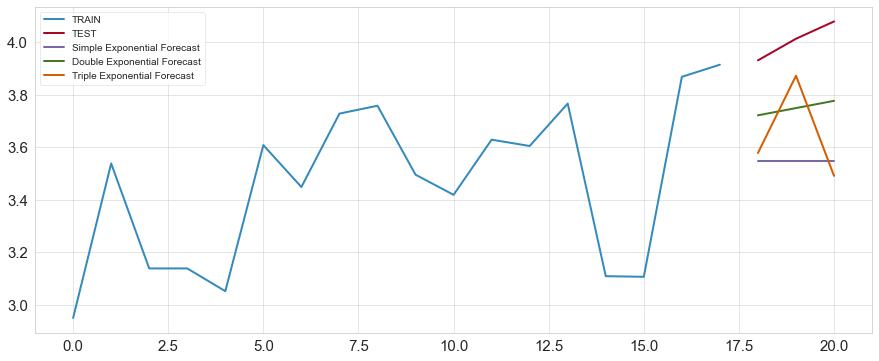

In [53]:
train_data['Sales'].plot(legend=True,label='TRAIN')
test_data['Sales'].plot(legend=True,label='TEST',figsize=(15,6))
predictions_simpleExpSmooth_model.plot(legend=True,label='Simple Exponential Forecast')
predictions_doubleExpSmooth_model.plot(legend=True,label='Double Exponential Forecast')
predictions_tripleExpSmooth_model.plot(legend=True,label='Triple Exponential Forecast')

In [42]:
model = tripleExpSmooth_model = ExponentialSmoothing(train_data['Sales'],trend='add',damped_trend=True,seasonal='add',seasonal_periods=6).fit()
fcast = model.predict(len(rfm_data),len(rfm_data)+2).rename('Triple Exponential Forecast')
print(fcast)

21    3.372002
22    3.546217
23    3.796982
Name: Triple Exponential Forecast, dtype: float64


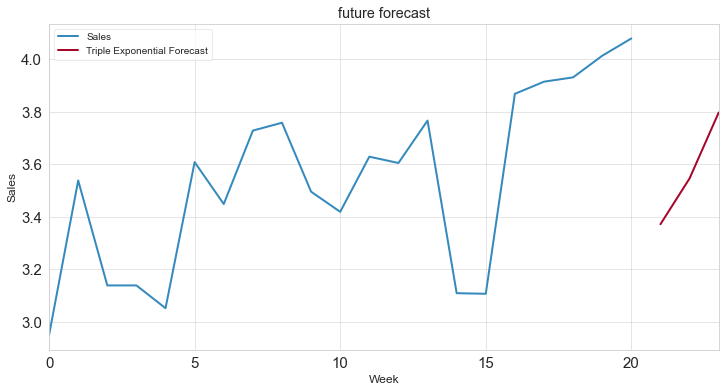

In [43]:
title = 'future forecast'
ylabel='Sales'
xlabel='Week'

ax = rfm_data['Sales'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);